Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

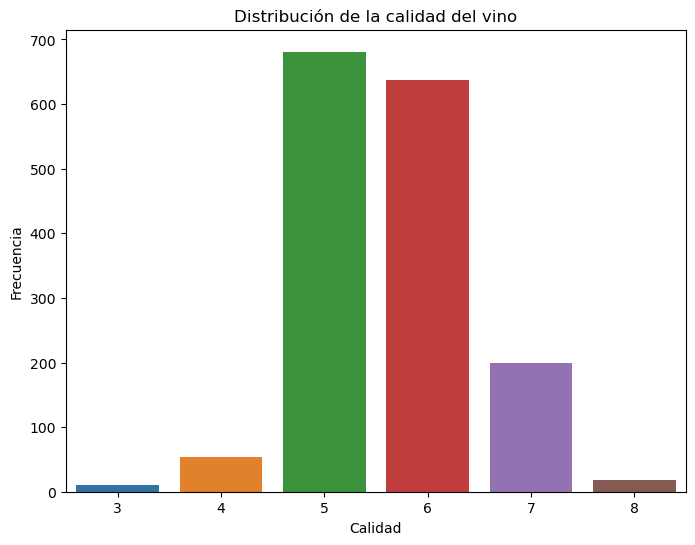

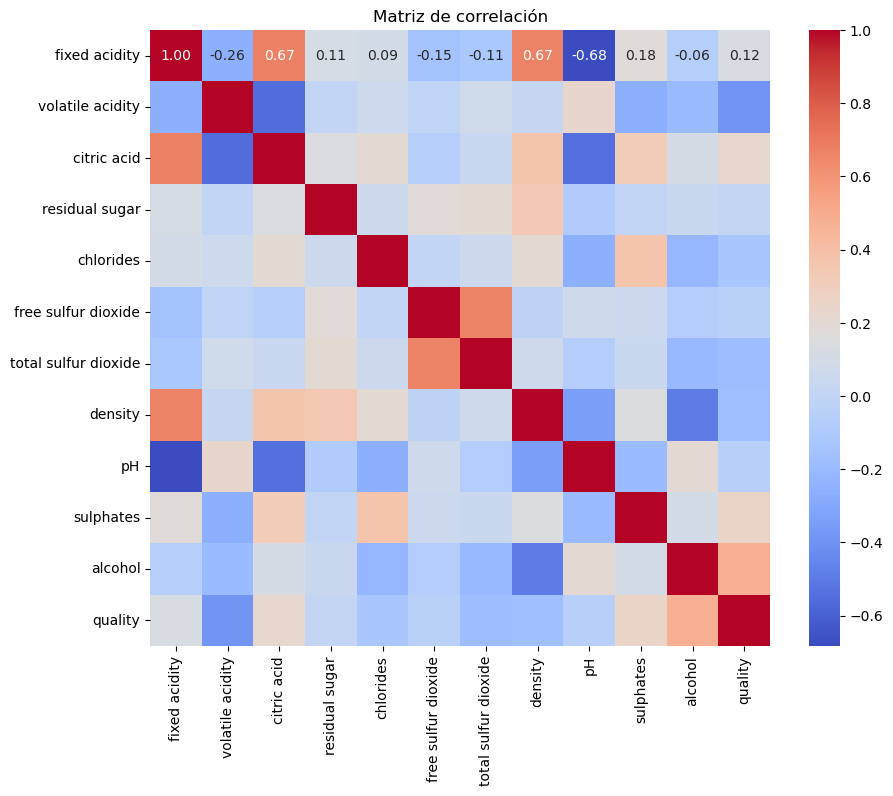


Características más relevantes:
                 Feature       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374

Métricas de desempeño:
Precisión: 0.58
Recall: 0.59
F1-score: 0.58
Matriz de Confusión:
[[ 0  0  0  1  0  0]
 [ 0  1  5  3  1  0]
 [ 2  2 88 35  3  0]
 [ 0  3 33 78 17  1]
 [ 0  2  5 13 21  1]
 [ 0  0  0  3  2  0]]


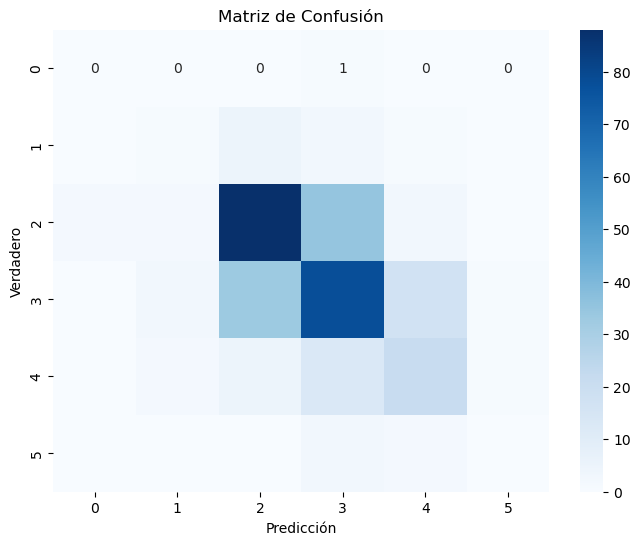

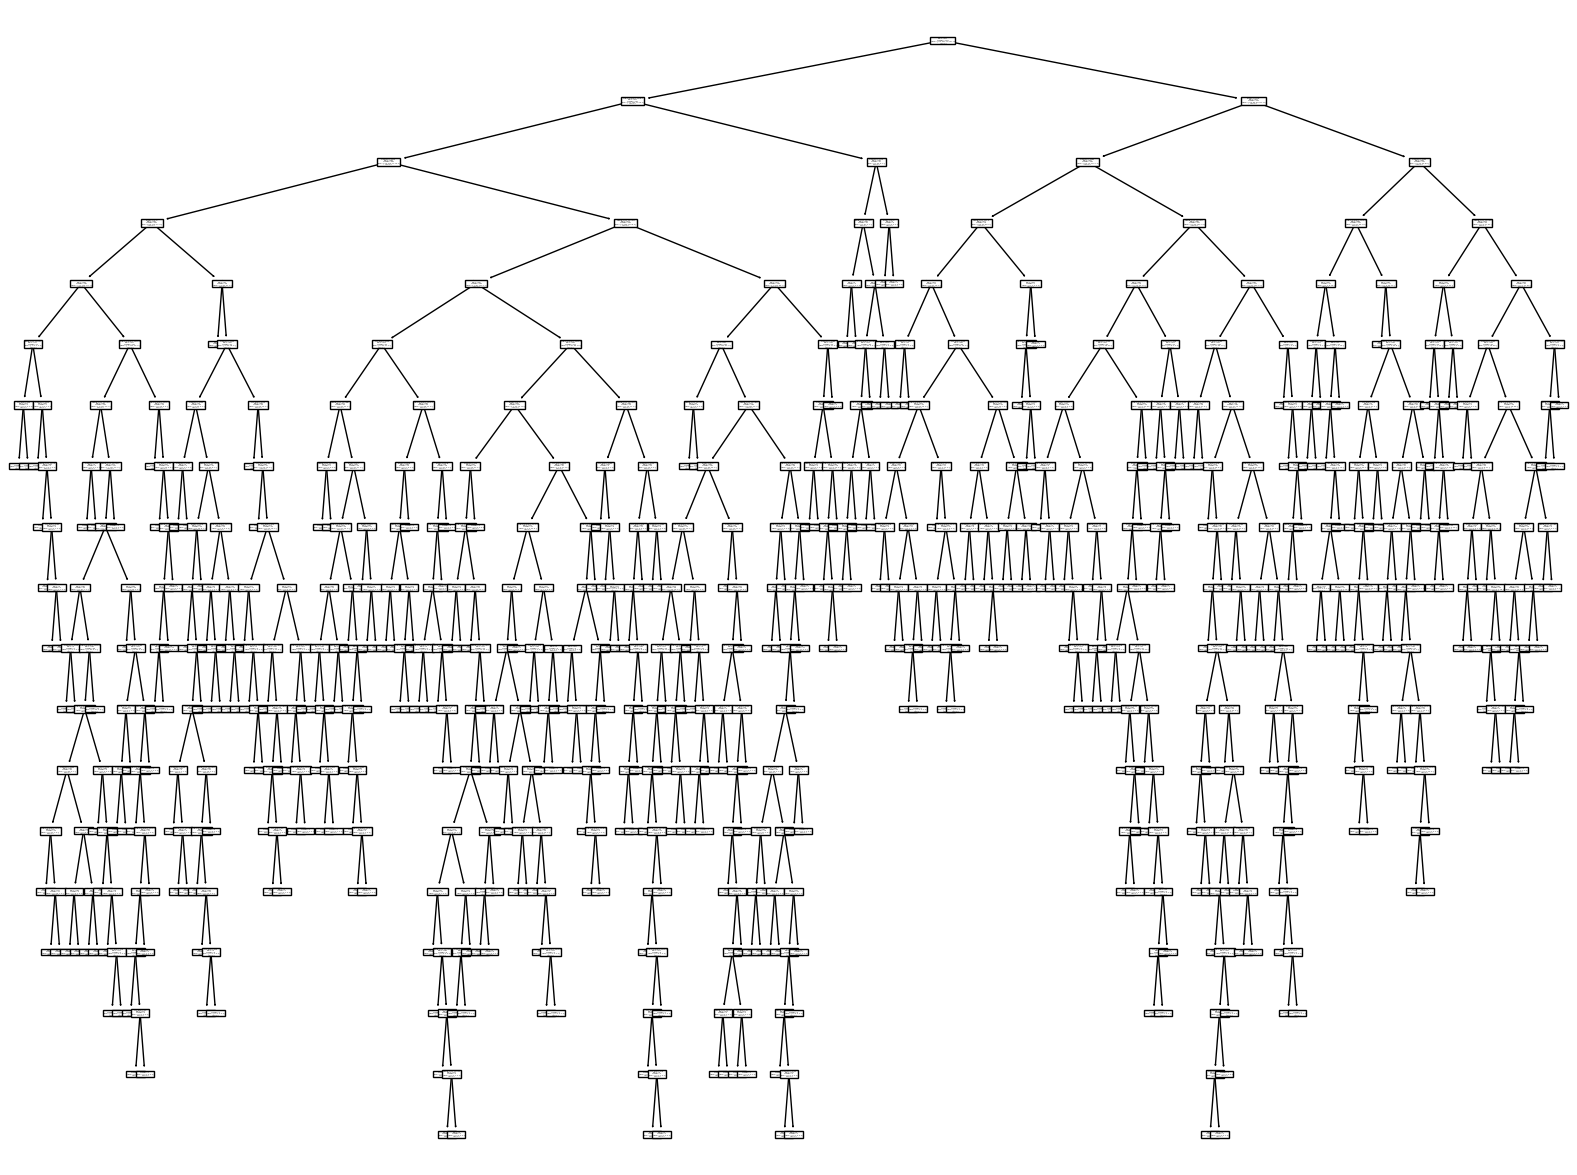

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Cargar el dataset
url = C:\Users\jonat\winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 1. Análisis exploratorio de los datos
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(data.describe())

# Visualización de la distribución de la calidad del vino
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de las relaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# 2. Preprocesamiento de datos
# No se requiere preprocesamiento para este dataset

# 3. Selección de características
X = data.drop('quality', axis=1)
y = data['quality']
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obtener las características seleccionadas y sus puntajes
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nCaracterísticas más relevantes:")
print(feature_scores)

# Seleccionar las características con puntajes más altos
selected_features = feature_scores['Feature'][:5].values
X_selected = X[selected_features]

# 4. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 6. Evaluar el desempeño del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de desempeño:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Matriz de Confusión:")
print(conf_matrix)

# 7. Realizar gráficas para visualizar los resultados del modelo
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Visualización del árbol de decisiones
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=X_selected.columns, class_names=['3', '4', '5', '6', '7', '8'])
plt.show()
